In [1]:
import pandas as pd
import numpy as np

In [2]:
carprices = pd.read_pickle('CarPricesData.pkl')

In [3]:
carprices.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


In [4]:
TargetVariable = ['Price']
Predictors = ['Age','KM','Weight','HP','MetColor','CC','Doors']

In [5]:
X = carprices[Predictors].values

In [6]:
X
print(X.shape)

(1435, 7)


In [7]:
Y = carprices[TargetVariable].values

In [8]:
Y
print(Y.shape)

(1435, 1)


we are standardizing the data as well. This is important for Neural Networks because it improves the model training speed and helps to find global minima.



In [9]:
from sklearn.preprocessing import StandardScaler
PredictorScaler = StandardScaler()
TargetVarScaler = StandardScaler()

In [10]:
PredictorScaler

StandardScaler()

In [11]:
PredictorScalerFit = PredictorScaler.fit(X)
TargetVarScalerFit = TargetVarScaler.fit(Y)

In [12]:
PredictorScalerFit

StandardScaler()

In [13]:
X = PredictorScalerFit.transform(X)
Y = TargetVarScalerFit.transform(Y)

In [14]:
X

array([[-1.78270076, -0.57595832,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       [-1.78270076,  0.11647404,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       [-1.72872398, -0.71670745,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       ...,
       [ 0.80818476, -1.37562683, -1.18853963, ..., -1.43972398,
        -1.42866784, -1.08444302],
       [ 0.75420798, -1.37829506, -1.18853963, ...,  0.69457758,
        -1.42866784, -1.08444302],
       [ 1.07806867, -1.82962616,  0.88815589, ..., -1.43972398,
         0.17817057,  1.01565918]])

In [15]:
Y

array([[ 0.77036821],
       [ 0.83966875],
       [ 0.89510918],
       ...,
       [-0.61564265],
       [-0.96214536],
       [-1.04530601]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=42)

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()

model.add(Dense(units = 5, input_dim = 7, kernel_initializer='normal', activation = 'relu'))

model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'tanh'))

model.add(Dense(units = 1,kernel_initializer = 'normal'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

out = model.fit(X_train,Y_train, batch_size = 20, epochs = 50, verbose = 1)

Epoch 1/50
51/51 [==============================] - 1s 2ms/step - loss: 0.9825
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.9457
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 0.8180
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 0.6775
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 0.5767
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 0.5010
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.4409
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 0.3915
Epoch 9/50
51/51 [==============================] - 0s 2ms/step - loss: 0.3459
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 0.3044
Epoch 11/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2706
Epoch 12/50
51/51 [==============================] - 0s 2ms/step - loss: 0.2424
Epoch 13/50
51/51 [==============================

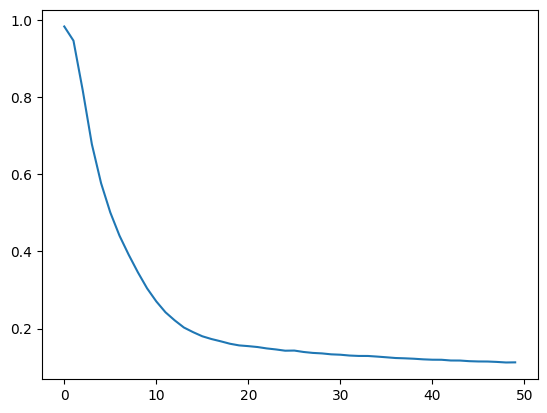

In [19]:
import matplotlib.pyplot as plt
plt.plot(out.history['loss'])

In [20]:
Predictions = model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [21]:
Predictions = TargetVarScalerFit.inverse_transform(Predictions)

In [22]:
Predictions.shape

(431, 1)

In [23]:
Y_test_original = TargetVarScalerFit.inverse_transform(Y_test)

In [24]:
Y_test_original

array([[ 9950.],
       [ 7995.],
       [ 7500.],
       [ 9950.],
       [ 8950.],
       [ 8995.],
       [ 9450.],
       [ 6750.],
       [11950.],
       [10950.],
       [ 9900.],
       [ 9750.],
       [11480.],
       [11950.],
       [ 8750.],
       [10995.],
       [13950.],
       [16950.],
       [ 7950.],
       [ 9950.],
       [12750.],
       [17650.],
       [ 8250.],
       [10750.],
       [ 8950.],
       [16895.],
       [ 8250.],
       [ 8950.],
       [15950.],
       [14950.],
       [ 7950.],
       [10950.],
       [10950.],
       [ 9450.],
       [10450.],
       [ 8250.],
       [ 8250.],
       [ 8950.],
       [14950.],
       [ 8950.],
       [ 9750.],
       [ 8950.],
       [12950.],
       [ 8500.],
       [ 9950.],
       [16950.],
       [10750.],
       [ 8750.],
       [10750.],
       [14350.],
       [11950.],
       [ 6750.],
       [15750.],
       [17950.],
       [ 7950.],
       [ 9950.],
       [11450.],
       [10750.],
       [18750.

In [25]:
Test_Data = PredictorScalerFit.inverse_transform(X_test)

In [26]:
df = pd.DataFrame(data = Test_Data, columns = Predictors)
df['Price'] = Y_test_original
df['Predictions'] = Predictions
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,Predictions
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,10160.078125
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10135.398438
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9032.452148
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9252.404297
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8636.583008


In [27]:
error = abs(df['Price'] - df['Predictions'])/df['Price']
error = error * 100

In [28]:
df['error'] = error

In [29]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,Predictions,error
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,10160.078125,2.111338
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10135.398438,26.771713
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,9032.452148,20.432695
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9252.404297,7.011012
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8636.583008,3.501866
...,...,...,...,...,...,...,...,...,...,...
426,73.0,176177.0,1075.0,110.0,1.0,1600.0,5.0,5950.0,7157.186035,20.288841
427,11.0,12500.0,1115.0,110.0,1.0,1600.0,5.0,18900.0,19265.583984,1.934307
428,56.0,35230.0,1025.0,97.0,0.0,1400.0,3.0,10950.0,10007.913086,8.603533
429,56.0,19313.0,1025.0,97.0,0.0,1400.0,3.0,10500.0,10113.829102,3.677818


In [30]:
print("Accuracy of the model is :" ,(100 - np.mean(error)))

Accuracy of the model is : 90.59066501201691


In [31]:
#Finding the best parameters

# batch_size = [5,10,15,20]
# epochs = [5,10,50,100]

# trial = 0
# for i in batch_size:
#     for j in epochs:
#         trial = trial + 1
#         model = Sequential()

#         model.add(Dense(units = 5, input_dim = 7, kernel_initializer='normal', activation = 'relu'))

#         model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'tanh'))

#         model.add(Dense(units = 1,kernel_initializer = 'normal'))

#         model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#         model.fit(X_train,Y_train, batch_size = i, epochs = j, verbose = 0)
#         Predictions = model.predict(X_test)
#         Y_test_original = TargetVarScalerFit.inverse_transform(Y_test)
#         Test_Data = PredictorScalerFit.inverse_transform(X_test)
        
#         df = pd.DataFrame(data = Test_Data, columns = Predictors)
#         df['Price'] = Y_test_original
#         df['Predictions'] = Predictions
#         df['error'] = error
#         error = abs(df['Price'] - df['Predictions'])/df['Price']
#         error = error * 100
#         print(trial,"batch_size",i,"epochs",j,"Accuracy of the model is :" ,(100 - np.mean(error)))
        
        